In [1]:
# Importing required libraries

# For reading and manipulating the csv file
import numpy as np
import pandas as pd
# Libraries for NLP
import nltk
import re 
from wordcloud import WordCloud, STOPWORDS
# Library to detect language. Most of the users won't have this package,
# so install this lib using pip/conda install langdetect
from langdetect import detect
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# To calculate correlation
from scipy.stats import pearsonr

In [2]:
# Downloading NLTK files required for cleaning
nltk.download('stopwords')            
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Reading the csv file using pandas
df = pd.read_csv('Twitter.csv')

In [4]:
# Id is unique identifier of the tweet, Unnamed: 0 is previous index column. Dropping them both
df.drop(['Unnamed: 0', 'Id'], axis = 1, inplace = True)

In [5]:
# Taking Random Sample of the data
df.sample(10)

,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
15389,"""Do I remember it? Every night I dream about i...",0.00,281.0,0.0,0.0,463350.0,8430467.0,19697,IMAGE,2020-06-06 16:30:00+00:00,0.0,1.0,14.0,2.0,0.0,160.0
49039,Who’s son trying to bless me with a new nail s...,0.00,52.0,0.0,0.0,67323.0,1572.0,0,TEXT,2020-08-28 15:19:55+00:00,0.0,0.0,0.0,0.0,0.0,0.0
5209,Özel okullarda KDV indirimi yapıldı https://t....,0.00,59.0,0.0,1.0,430530.0,903135.0,0,TEXT,2020-08-30 04:30:06+00:00,0.0,1.0,0.0,0.0,0.0,0.0
8751,"Kenapa pas udah ngantuk banget, mata udah kriy...",-11.95,257.0,0.0,0.0,349781.0,798996.0,856,TEXT,2020-12-26 17:49:03+00:00,0.0,1.0,185.0,109.0,0.0,2940.0
17618,Lebaran starter pack:\n\nPaginya sholat Ied\nS...,0.00,75.0,0.0,0.0,53653.0,660176.0,112,TEXT,2021-05-12 04:51:08+00:00,0.0,0.0,5982.0,659.0,1.0,66420.0
35274,"In the fight against gun violence, we deserve ...",0.00,279.0,1.0,0.0,24322.0,2889481.0,7812,VIDEO,2021-03-02 18:47:10+00:00,0.0,1.0,634.0,78.0,0.0,7120.0
19404,"Ugaliing suotin nang tama ang iyong face mask,...",18.57,81.0,0.0,0.0,813722.0,7061458.0,7513,IMAGE,2020-08-28 02:00:00+00:00,0.0,1.0,85.0,43.0,0.0,1280.0
41029,Weekly Trade Ideas: \n\n$FUBO\n$SKLZ\n$CELH \n...,0.00,130.0,0.0,1.0,3664.0,11124.0,267,TEXT,2021-02-21 02:15:26+00:00,0.0,0.0,155.0,25.0,3.0,1830.0
29047,“#WeDO everything to become better versions of...,0.00,297.0,2.0,1.0,230.0,915.0,6,VIDEO,2021-03-26 03:34:37+00:00,0.0,0.0,2749.0,1181.0,0.0,39300.0
2846,【しかし…】フェリシモ、商品と共にラッピングバッグを配送するサービス開始\nhttps://...,-19.37,138.0,0.0,1.0,281961.0,1289686.0,9372,IMAGE,2020-10-20 09:06:10+00:00,0.0,1.0,108.0,51.0,0.0,1590.0


The tweets happen to be in multiple languages. In the above sample we see examples of English, Devanagiri, Tamil, Indonesian, Portuguese and Japanese. (one model cannot handle multiple languages)

Tweets contain emojis, urls, hashtags, username-mentions.

In [6]:
df.shape

(50000, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Post Contet           50000 non-null  object 
 1   Sentiment score       50000 non-null  float64
 2   Post Length           50000 non-null  float64
 3   Hashtag count         50000 non-null  float64
 4   Content URL count     50000 non-null  float64
 5   Tweet count           50000 non-null  float64
 6   Followers count       50000 non-null  float64
 7   Listed Count          50000 non-null  int64  
 8   Media Type            50000 non-null  object 
 9   Published DateTime    50000 non-null  object 
 10  Mentions Count        50000 non-null  float64
 11  Post author verified  50000 non-null  float64
 12  Likes                 50000 non-null  float64
 13  Shares                50000 non-null  float64
 14  Comments              50000 non-null  float64
 15  Impact             

No missing data

    Post Content - The text in the tweet
    Sentiment score - Ranges from -20 to +20 (0 - neutral)
    Post Length - The length of the tweet
    Hashtag Count - The number of hashtags used in the tweet
    Content URL Count - The number of URLs mentioned in the tweet
    Tweet Count - The total number of tweets posted by the author of the tweet
    Followers Count - The number of followers of the author of the post
    Listed Count - the number of lists the post author is a part of
    Media Type - The media type of the post (Text, image, video)
    Published Datetime - The published time of the tweet
    Mentions Count - The number of user mentions in the tweet
    Post Author Verified - 1 if author is a verified user
    Likes - Likes received for the tweet
    Shares - Retweets received for the tweet
    Comments - Number of comments for the tweet

The column Impact is the target variable. It is a value that could help decide if the tweet could go viral or not. Highest the impact, more viral is the tweet

In [8]:
df.nunique()

Post Contet             47429
Sentiment score          2100
Post Length               329
Hashtag count              21
Content URL count           8
Tweet count             39328
Followers count         39024
Listed Count            13950
Media Type                  3
Published DateTime      47412
Mentions Count             13
Post author verified        2
Likes                    9525
Shares                   5535
Comments                  465
Impact                  10809
dtype: int64

There seem to be a few dupilcate values

In [9]:
df['Post Contet'].value_counts().head(10)

／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒\n＼\n\nTwitterではイオンギフトカード5,000円分を抽選で20名さまにプレゼント😍\n\n①@AEON_JAPANをフォロー\n②本投稿をリツイート🔁\n結果はすぐ届く📩\n5/9(日)まで\n\nhttps://t.co/O21C2KyZCA\n\n#イオンチャレンジ                                                                                                                   11
今年の節分は2/2(火)‼️\n\n世界的名店 鮨よしたけ監修 2つの恵方巻🍣\nネットでご予約も💁‍♀️ #イオンの恵方巻👏\n\n😍抽選で10名さまにイオンギフトカード2000円分が当たるキャンペーンは2/2迄🎁\n1⃣@AEON_JAPAN をフォロー\n2⃣本投稿をRT🔁\n結果がすぐ届く\n\n#イオンチャレンジ\n詳細▶https://t.co/6pH42kPMSb                                                                                                                 10
／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒\n＼\n\nTwitterではイオンギフトカード5,000円分を\n抽選で20名さまにプレゼント😍\n\n①@AEON_JAPANをフォロー\n②本投稿をリツイート🔁\n結果はすぐ届く📩\n5/31(月)まで\n\nhttps://t.co/O21C2KyZCA\n\n#イオンチャレンジ                                                                                                                 7
私は #色々な肌悩みを解決したい 抽選で10名様に #美肌菌 発想の #ジェニフィック 現品が当たるキャンペーン実施中！本アカウントをフォロー&amp;どんな肌を目

In [11]:
df[df['Post Contet'] == df['Post Contet'].value_counts().index[0]]

,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
5765,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.47,174.0,0.0,1.0,10939776.0,869986.0,1710,TEXT,2021-05-05 01:00:01+00:00,0.0,1.0,1841.0,18802.0,0.0,206430.0
14989,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.66,174.0,0.0,1.0,10854618.0,869478.0,1716,TEXT,2021-04-12 01:00:00+00:00,0.0,1.0,2108.0,21031.0,0.0,231390.0
16901,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.61,174.0,0.0,1.0,10670554.0,867465.0,1703,TEXT,2021-04-18 01:00:30+00:00,0.0,1.0,2079.0,20433.0,0.0,225120.0
19823,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.42,174.0,0.0,1.0,10562427.0,866168.0,1711,TEXT,2021-04-19 01:00:01+00:00,0.0,1.0,1833.0,18684.0,0.0,205170.0
25908,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.68,174.0,0.0,1.0,10556102.0,866054.0,1707,TEXT,2021-04-01 01:00:01+00:00,0.0,1.0,1896.0,18612.0,0.0,205080.0
30155,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.42,174.0,0.0,1.0,10748268.0,867933.0,1703,TEXT,2021-04-27 01:00:01+00:00,0.0,1.0,1659.0,18193.0,0.0,198520.0
34852,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.55,174.0,0.0,1.0,10884839.0,869763.0,1714,TEXT,2021-04-05 01:00:00+00:00,0.0,1.0,2256.0,22065.0,0.0,243210.0
35675,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.47,174.0,0.0,1.0,10501830.0,865320.0,1706,TEXT,2021-04-02 01:00:00+00:00,0.0,1.0,2154.0,20725.0,0.0,228790.0
41843,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.61,174.0,0.0,1.0,10890727.0,869811.0,1715,TEXT,2021-04-16 01:00:00+00:00,0.0,1.0,1888.0,19102.0,0.0,209900.0
44192,／\n#ラン活 イオンで試着しよ！\nイオンの #かるすぽランドセル であんしんの6年間♡🎒...,-15.42,174.0,0.0,1.0,10878275.0,869778.0,1710,TEXT,2021-04-30 01:00:00+00:00,0.0,1.0,2476.0,23484.0,0.0,259600.0


All the tweets are same, but the instances are different. These were all posted within timeframe of 2 months : Apr-2021 and May-2021

Plus they all had similar impacts.

The translation of this tweet is: 
    
    / \ N #Run Live Try on with Aeon! \ n AEON's #Karusupo school bag for 6 years ♡ 🎒 \ n \\ n \ n On Twitter, AEON gift card worth 5,000 yen will be presented to 20 people by lottery 😍 \ n \ n ① Follow @AEON_JAPAN \ n ② Book Retweet posts 🔁 \ n Results will arrive soon 📩 \ n Until 5/9 (Sun) \ n \ n https://t.co/O21C2KyZCA \ n \ n #Aeon Challenge
    
So this was a challenge (Called Aeon Challenge). That explains the repetition and timeframe and the duplicates.

The data integrity seems fine. We will continue to check the data integrity while we are performing EDA

# EDA

In [12]:
#Function for checking correlation between two numeric variable
def correlation(col_1, col_2 = 'Impact'):    
    r,_ = pearsonr(df[col_1], df[col_2])
    print('The correlation coefficient for {} and {} is {}'.format(col_1, col_2, r))

## Target Variable: Impact

In [13]:
df['Impact'].astype('float').describe()

count     50000.000000
mean      40038.735600
std      103075.779094
min           0.000000
25%          10.000000
50%        2100.000000
75%       27500.000000
max      997980.000000
Name: Impact, dtype: float64

<AxesSubplot:xlabel='Impact', ylabel='Count'>

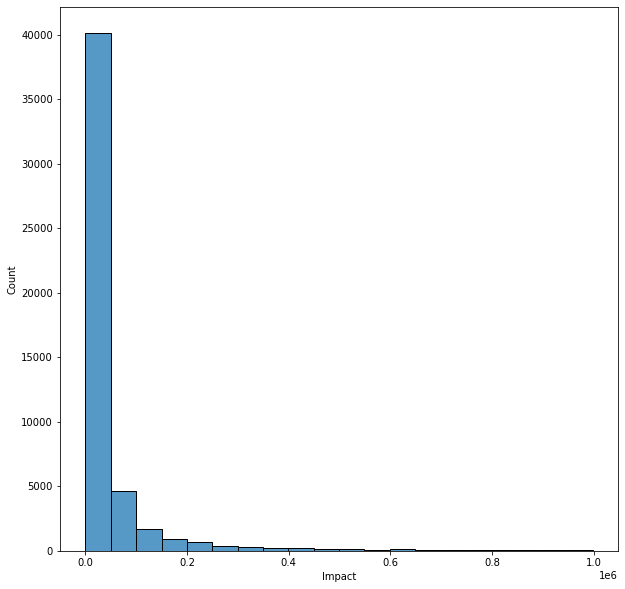

In [14]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Impact', data = df, bins = 20)

Most of the values are 0. Only few of the tweets have high impact. (This type of distribution which has a right skew, is typical in many scenarios : Likes on Instagrams, Salary of employees in any company, etc)

Lets see how many outliers are present.

In [15]:
def outliers_iqr(column):
    """A function to identify outliers using IQR"""
    iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)
    upper_lim = np.percentile(df[column], 75) + iqr
    lower_lim = np.percentile(df[column], 25) - iqr
    print('Upper Limit = ', upper_lim)
    print('No of outliers = ', df[(df[column]<lower_lim) | (df[column]>upper_lim)].shape[0])

In [16]:
outliers_iqr('Impact')

Upper Limit =  54990.0
No of outliers =  9108


In [17]:
print('75th percentile: ',np.percentile(df['Impact'], 75))

75th percentile:  27500.0


We will divide the dataset into 3 parts:

1. High impact = Upper Limit (75th percentile + IQR) (> 54990)
2. Mid imapct  = 75th percentile to upper limit      (54990 - 27500)
3. Low impact  = Below Mid impact                    (< 27500)

Now we know that there are 9108 tweets in the High impact section (the outliers). We will find Mid impact and Low impact tweets count next

In [18]:
print('High Impact tweets = 9108')
print('Mid Impact tweets = ', df[(df['Impact']<=54990) & (df['Impact']>27500)].shape[0])
print('Low Impact tweets = ', df[df['Impact']<=27500].shape[0])

High Impact tweets = 9108
Mid Impact tweets =  3391
Low Impact tweets =  37501


We will concentrate more on the High and Mid level tweets

We can just label them (just for analysis purpose), and later remove the column

In [19]:
def impact_level(row):
    """This function will label the impact of tweet i the foll way:
            High impact = Upper Limit (> 54990)
            Mid impact = 75th percentile to upper limit (54990 - 27500)
            Low impact = Below Mid impact (< 27500)"""
    if (row['Impact'] > 54990):
        row['Impact_level'] = 'High'
    elif ((row['Impact']<=54990) and (row['Impact']>27500)):
        row['Impact_level'] = "Mid"
    else:
        row['Impact_level'] = 'Low'
    return row

df = df.apply(impact_level, axis = 1)

In [20]:
df.rename(columns={'Post Contet':'Post Content'}, inplace=True)

### Published Datatime

In [21]:
df['Published DateTime'] = pd.to_datetime(df['Published DateTime'])

In [22]:
print('Start Date = ', df['Published DateTime'].min())
print('End Date   = ', df['Published DateTime'].max())

Start Date =  2020-03-31 18:37:46+00:00
End Date   =  2021-05-30 17:02:39+00:00


1 year 2 months timeline of tweets

<AxesSubplot:xlabel='Published DateTime'>

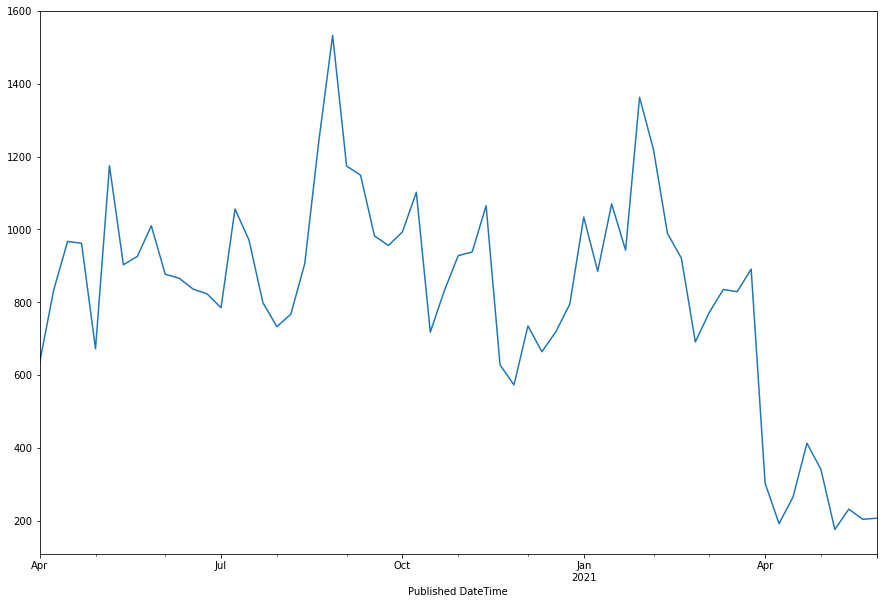

In [23]:
df.resample('W', on='Published DateTime')['Post Content'].count().plot(figsize = (15,10))

Two peaks are clearly visible: Sept-2020 and Feb-2021

### Post Content

In [24]:
df['Post Content'].sample(5)

41221    $CLDX - Why Celldex Has Been A Big Winner In 2...
8157     Singapore #startup Breathonix has developed a ...
44444    #Thalaiva @rajinikanth sir !!!\n\nJust Now not...
30634    ด่วน! "แม่สอด" พบผู้ป่วยโควิด10 ราย\n#ข่าววันน...
9664     1000RT：【事故】充電中のiPhoneが風呂に落下、12歳少年が感電死 露\nhttps...
Name: Post Content, dtype: object

Using langdetect, we will make an estimate of value counts of all the languages. Now the method is not entirely accurate, but we are not looking for an exact answer

In [25]:
def language_count(row):
    """This function will detect the language of the tweet using Langdetect"""
    try:
        lang = detect(row['Post Content'])
        row['Lang'] = lang
        return row
    except:
        row['Lang'] = 'Other'
        return row

df = df.apply(language_count, axis = 1) 

In [26]:
df['Lang'].value_counts()

en       26602
ja        7558
id        4647
th        2204
hi        1589
es        1114
ta         938
ar         755
fr         651
tl         546
Other      434
pt         430
de         305
ko         211
tr         207
et         159
mr         147
it         144
ca         128
so         125
nl          87
af          87
sw          72
vi          72
no          70
zh-cn       69
ur          65
da          52
sv          47
ro          45
bn          44
hr          36
ru          35
fi          34
cy          30
pl          29
gu          29
sl          29
kn          22
sq          22
ml          20
sk          19
hu          17
lt          15
te          11
uk          10
ne          10
cs           8
zh-tw        7
lv           6
pa           5
el           1
fa           1
Name: Lang, dtype: int64

In [27]:
df['Lang'].nunique()

53

As expected, English dominates the count, followerd by Japanese, Indonesian, Thai, Hindi and Spanish.

There are 53 languages in total, with a few languages having fewer than 100 tweets. Such languages will be clubbed under 'Others'.

In [28]:
lang_list = df['Lang'].value_counts()[df['Lang'].value_counts()<100].index.to_list()

In [29]:
def lang_map(row):
    if row['Lang'] in lang_list:
        row['Lang'] = 'Other'
    return row

df = df.apply(lang_map, axis = 1)

In [30]:
df['Lang'].value_counts()

en       26602
ja        7558
id        4647
th        2204
hi        1589
Other     1540
es        1114
ta         938
ar         755
fr         651
tl         546
pt         430
de         305
ko         211
tr         207
et         159
mr         147
it         144
ca         128
so         125
Name: Lang, dtype: int64

### Sentiment Score

In [31]:
df['Sentiment score'].describe()

count    50000.000000
mean         1.068916
std         10.436746
min        -20.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         20.000000
Name: Sentiment score, dtype: float64

<AxesSubplot:xlabel='Sentiment score', ylabel='Count'>

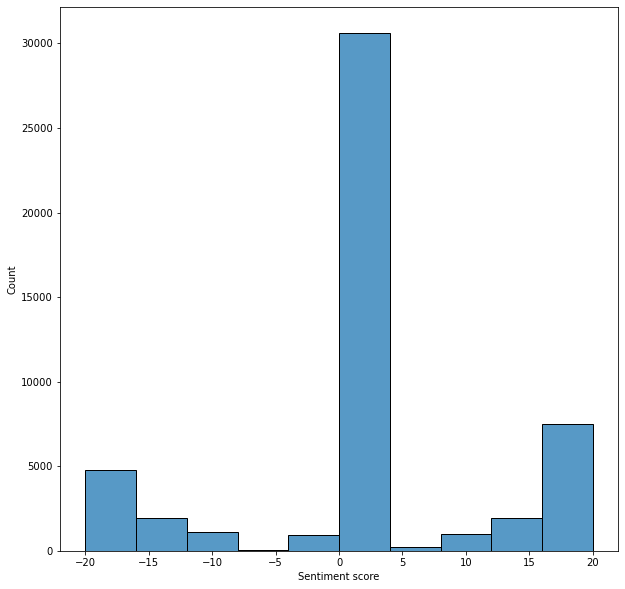

In [32]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Sentiment score', data = df, bins =10)

Most of the tweets have sentiment score of 0. There are low no of values from  -10 to 10 (We would've considered them as neutral anyways).

The no of negative and positive sentiment tweets are almost equal.

Lets check the influence of sentiment on Impact

<AxesSubplot:xlabel='Sentiment score', ylabel='Count'>

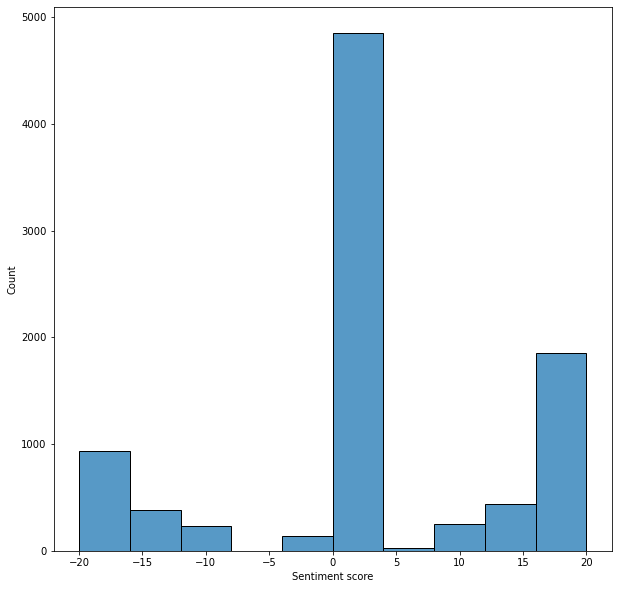

In [33]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Sentiment score', data = df[df['Impact_level'] == 'High'], bins =10)

The distribution doesn't change much, but positive sentiment tweets do have an edge over negative tweets

In [34]:
df.columns

Index(['Post Content', 'Sentiment score', 'Post Length', 'Hashtag count',
       'Content URL count', 'Tweet count', 'Followers count', 'Listed Count',
       'Media Type', 'Published DateTime', 'Mentions Count',
       'Post author verified', 'Likes', 'Shares', 'Comments', 'Impact',
       'Impact_level', 'Lang'],
      dtype='object')

### Post Length

In [35]:
df['Post Length'].describe()

count    50000.000000
mean       154.692360
std         79.099411
min          1.000000
25%         94.000000
50%        142.000000
75%        215.000000
max        373.000000
Name: Post Length, dtype: float64

The length limit on twitter is 280 characters.

In [36]:
print(df[df['Post Length']>280]['Post Content'].iloc[1])
print()
print('length = ', 
      len(df[df['Post Length']>280]['Post Content'].iloc[1]))
print()
print('Length given in dataset = ', df[df['Post Length']>280]['Post Length'].iloc[1] )

During these unprecedented times, we are committed to bringing you closer to what you love, no matter where you are. Introducing #BMWContactless Experience that lets you explore the world of BMW from the comfort of your home. 
Visit: https://t.co/EXAZsrni7N
#StayHome #StaySafe https://t.co/1aqUa1JTdb

length =  301

Length given in dataset =  301.0


<AxesSubplot:xlabel='Post Length', ylabel='Count'>

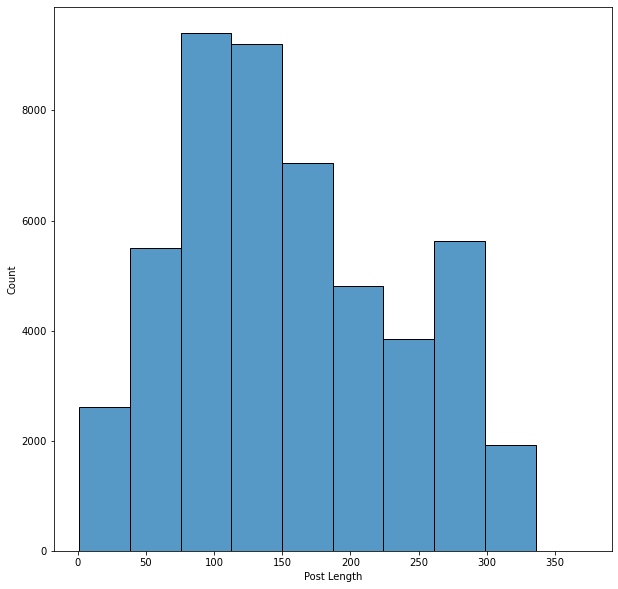

In [37]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Post Length', data = df, bins =10)

Follows a normal distribution (almost). Lets see the effect of Length on Impact

<AxesSubplot:xlabel='Post Length', ylabel='Impact'>

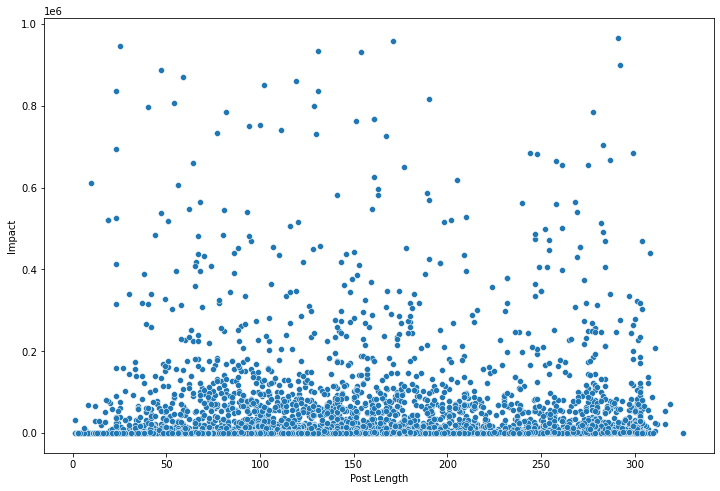

In [38]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Post Length', y = 'Impact', data = df.sample(5000))

No correlation is visible

<AxesSubplot:xlabel='Post Length', ylabel='Count'>

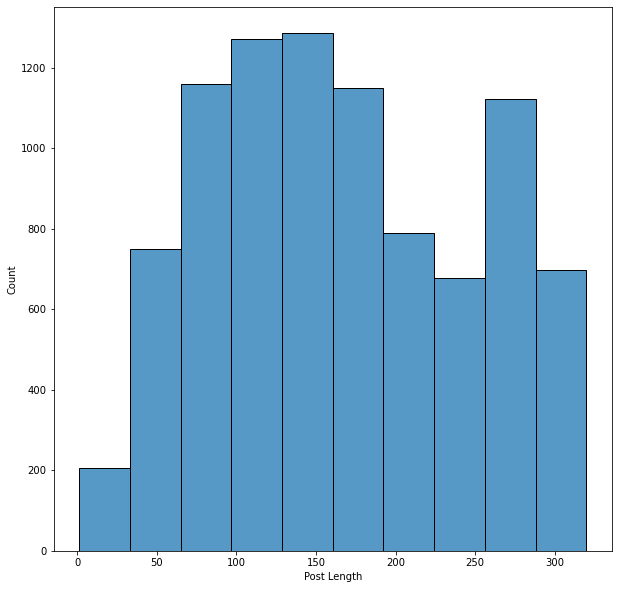

In [39]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Post Length', data = df[df['Impact_level'] == 'High'], bins =10)

The skew is towards left. Impact level might have

<AxesSubplot:xlabel='Post Length', ylabel='Impact'>

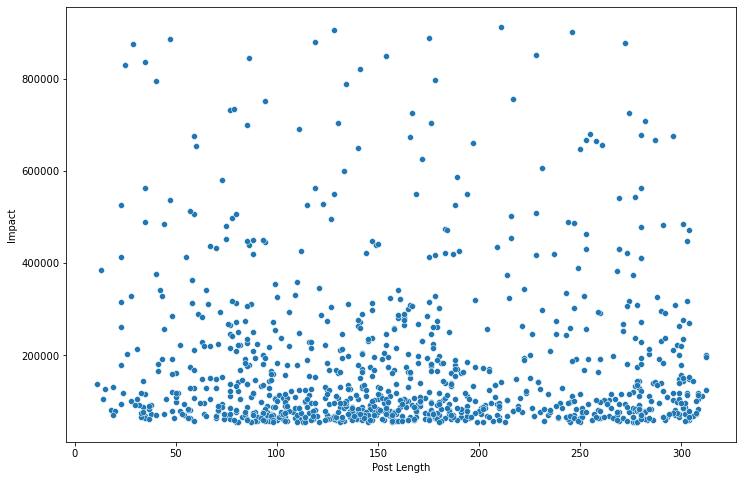

In [40]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Post Length', y = 'Impact', data = df[df['Impact_level'] == 'High'].sample(1000))

<AxesSubplot:xlabel='Post Length', ylabel='Count'>

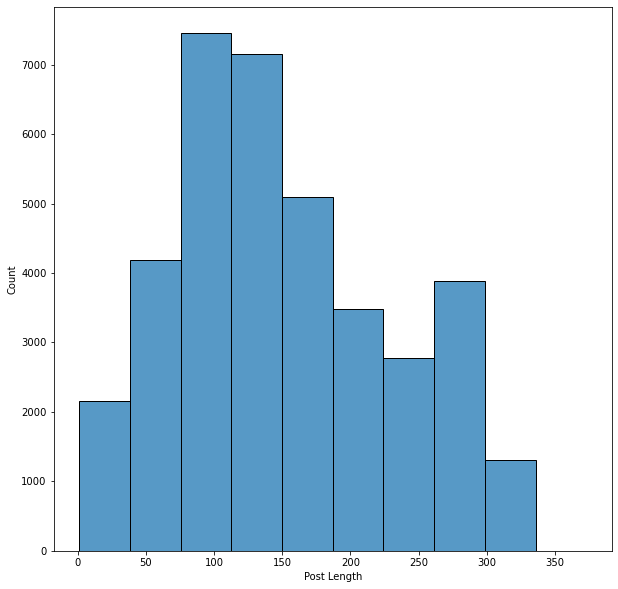

In [41]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Post Length', data = df[df['Impact_level'] == 'Low'], bins =10)

Here, when the impact is low, the skew is towards right. This means lower impact tweets might have lower lengths than higher impact tweets.

(Hypothesis test??)

### Hashtag count

In [42]:
df['Hashtag count'].describe()

count    50000.000000
mean         0.687520
std          1.346979
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         21.000000
Name: Hashtag count, dtype: float64

<AxesSubplot:xlabel='Hashtag count', ylabel='Count'>

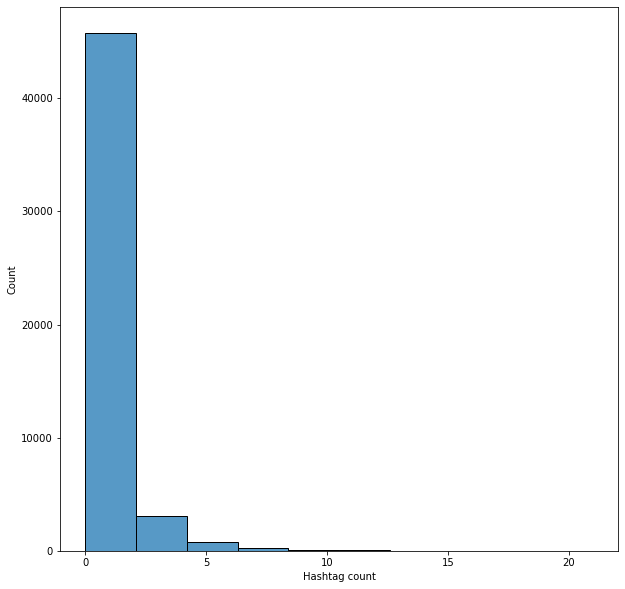

In [43]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Hashtag count', data = df, bins =10)

In [44]:
df[df['Hashtag count'] == 5]['Post Content'].iloc[0]

"Know the story of @irbishi's grand gesture towards @bhogleharsha during @sachin_rt's Farewell Test, only on #CricbuzzInConversation\n\nWatch: https://t.co/ARbCa6eakN\n\n#SachinTendulkar #Cricket #TeamIndia #MasterBlaster https://t.co/uq7iGsnuHB"

We will now extract all the hashtags for the high impact tweets and see whether certain types of hastags affect impacts more than others. We can even make a new binary feature : high_impact_hashtag?

In [45]:
df['Post Content'] = df['Post Content'].str.replace('\n', ' ')

In [46]:
df[df['Hashtag count'] == 5]['Post Content'].iloc[0]

"Know the story of @irbishi's grand gesture towards @bhogleharsha during @sachin_rt's Farewell Test, only on #CricbuzzInConversation  Watch: https://t.co/ARbCa6eakN  #SachinTendulkar #Cricket #TeamIndia #MasterBlaster https://t.co/uq7iGsnuHB"

In [47]:
re.findall('#\S+', df[df['Hashtag count'] == 5]['Post Content'].iloc[0])

['#CricbuzzInConversation',
 '#SachinTendulkar',
 '#Cricket',
 '#TeamIndia',
 '#MasterBlaster']

In [48]:
counts = {}
for i in re.findall('#\S+', df[df['Hashtag count'] == 5]['Post Content'].iloc[0]):
    counts[i] = counts.get(i, 0) + 1

In [49]:
counts = {}
def hashtag_counts(row):
    global counts
    hashtags = re.findall('#\S+', row)
    for i in hashtags:
        counts[i] = counts.get(i, 0) + 1
    return row

In [50]:
df['Post Content'] = df['Post Content'].apply(hashtag_counts)

In [51]:
cnts = pd.Series(counts)

In [52]:
cnts.sort_values(ascending = False).head(10)

#COVID19         647
#BB14            459
#BiggBoss14      401
#IPL2021         295
#WhistlePodu     266
#Yellove         261
#BiggBoss2020    222
#BiggBoss        203
#乃木坂46           193
#DMK             174
dtype: int64

Covid-19 is the most used hashtag, followed by Big Boss - 14 and IPL.

WhistlePodu is the tagline of Chennai Super Kings.(A team in IPL)

乃木坂46 (Nogizaka46) is a Japanese music group

Lets see if we can extract any high impact hashtag

In [53]:
del counts

In [54]:
counts = {}
df[df['Impact_level'] == 'High']['Post Content'].apply(hashtag_counts)

14       政府は自民党外交部会・外交調査会合同会議で感染爆発のインドやネパール、パキスタン3か国から4...
20       देश के गृहमंत्री के नाते मैं मोदी सरकार की ओर ...
25       【祝】本日4月7日で「アニメ『きらりん☆レボリューション』放送15周年」  2006年から2...
26       もうそれにしか見えないwwwww ゆるさんwwww https://t.co/pm3Voowe1k
29       We are troubled by a recent pattern of violenc...
                               ...                        
49983    Let us be vocal about local.  This approach ca...
49984    We've spoken to Pfizer, Moderna for vaccines, ...
49986    Delhi has been allotted more than the (oxygen)...
49987                       女騎士の休日 https://t.co/Wws5hAIJee
49993    อ่านข่าวนี้แล้ว มีข้อสงสัยเดียวครับ ผมจำได้ว่า...
Name: Post Content, Length: 9108, dtype: object

In [55]:
cnts = pd.Series(counts)

In [56]:
cnts.sort_values(ascending = False).head(20)

#IPL2021                    264
#WhistlePodu                252
#Yellove                    248
#COVID19                    126
#PlayBold                   101
#WeAreChallengers            99
#OneFamily                   68
#MumbaiIndians               67
#ジャニーズ                       67
#MI                          59
#イオンチャレンジ                    55
#BTS                         49
#MIvCSK                      43
#CSK                         42
#BB14                        42
#OnThisDay                   42
#VIVOIPL                     36
#WhatsHappeningInMyanmar     33
#乃木坂46                       33
#CSKvRCB                     33
dtype: int64

Most of the high impact tweets are about IPL

ジャニーズ = Johnny's in japanese

イオンチャレンジ  = Aeon Challenge

BTS = Korean music band

#WhatsHappeningInMyanmar is related to recent military coup that occured in Myanmar

In [57]:
del counts
counts = {}
df[df['Impact_level'] == 'Low']['Post Content'].apply(hashtag_counts)
cnts = pd.Series(counts)
cnts.sort_values(ascending = False).head(20)

#COVID19            462
#BB14               357
#BiggBoss14         311
#DMK                169
#BiggBoss2020       155
#乃木坂46              145
#BiggBoss           143
#coronavirus        131
#RubinaDilaik       131
#gaming             120
#MKStalin           114
#BREAKING            96
#RahulVaidya         92
#AWANInews           79
#UCL                 79
#BJP                 79
#SachinTendulkar     76
#JasminBhasin        75
#unsubscribe         70
#SunNews             63
dtype: int64

Tweets about COVID-19 are high in number and have low impact.

Big Boss 2020 also had low impact

#Breaking refers to breaking news

### Content URL count

In [58]:
df['Content URL count'].describe()

count    50000.000000
mean         0.480260
std          0.526019
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: Content URL count, dtype: float64

<AxesSubplot:xlabel='Content URL count', ylabel='Count'>

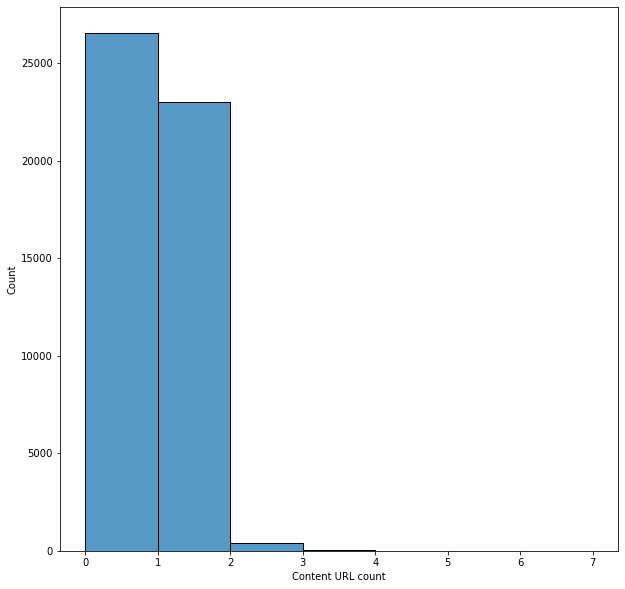

In [59]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Content URL count', data = df, bins =7)

<AxesSubplot:xlabel='Content URL count', ylabel='Count'>

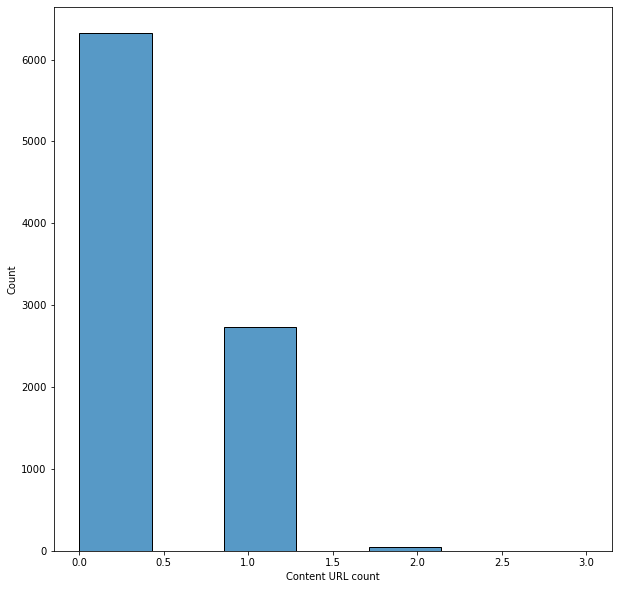

In [60]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Content URL count', data = df[df['Impact_level']=='High'], bins =7)

High impact tweets don't have multiple links. Most of them don't even have a single links. A single link is more effective than multiple links

### Tweet count

In [61]:
#The total number of tweets posted by the author of the tweet

In [62]:
df['Tweet count'].describe()

count    5.000000e+04
mean     2.414257e+05
std      1.607467e+06
min      0.000000e+00
25%      1.123775e+04
50%      5.273800e+04
75%      2.595015e+05
max      5.044408e+07
Name: Tweet count, dtype: float64

<AxesSubplot:xlabel='Tweet count', ylabel='Count'>

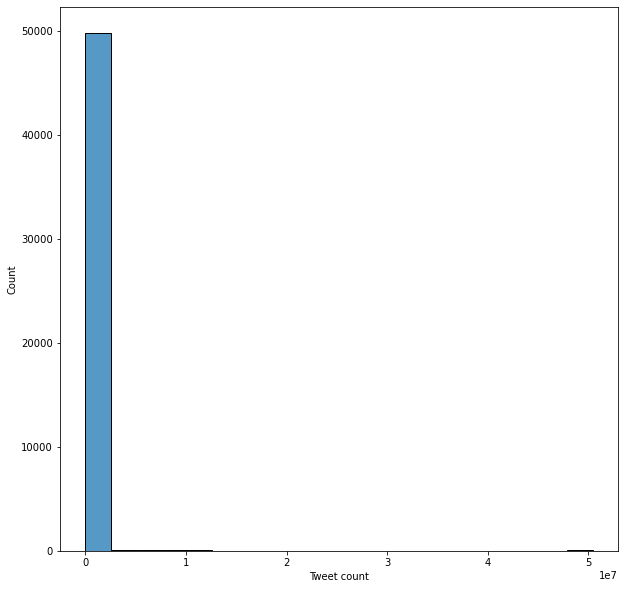

In [63]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Tweet count', data = df, bins =20)

Most of the tweets are made by users who have zero tweet count

<AxesSubplot:xlabel='Tweet count', ylabel='Count'>

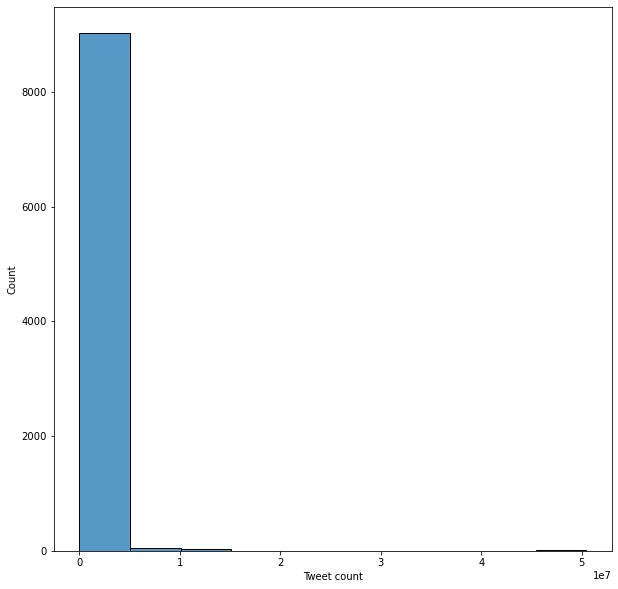

In [64]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Tweet count', data = df[df['Impact_level'] == 'High'], bins =10)

In [65]:
outliers_iqr('Tweet count')

Upper Limit =  507765.25
No of outliers =  4213


In [66]:
correlation('Tweet count')

The correlation coefficient for Tweet count and Impact is -0.005341845051610563


So basically no correlation

### Followers count

In [67]:
df['Followers count'].describe()

count    5.000000e+04
mean     4.648759e+06
std      1.254513e+07
min      0.000000e+00
25%      1.053900e+04
50%      3.551225e+05
75%      2.809978e+06
max      1.144406e+08
Name: Followers count, dtype: float64

<AxesSubplot:xlabel='Followers count', ylabel='Count'>

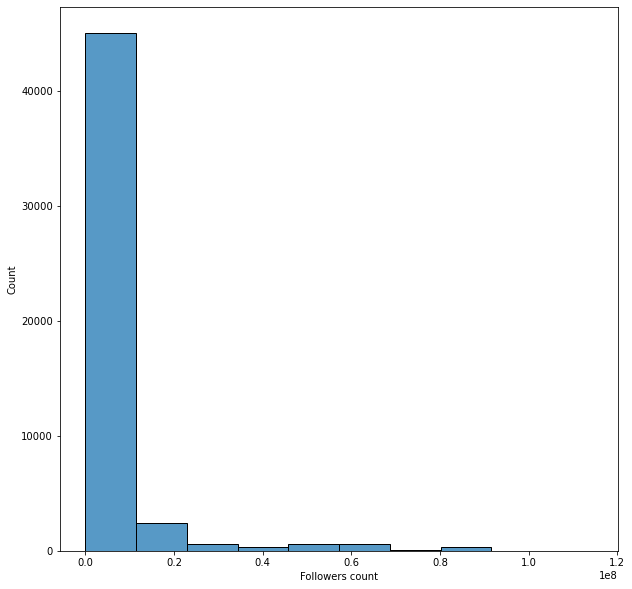

In [68]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Followers count', data = df, bins =10)

<AxesSubplot:xlabel='Followers count', ylabel='Count'>

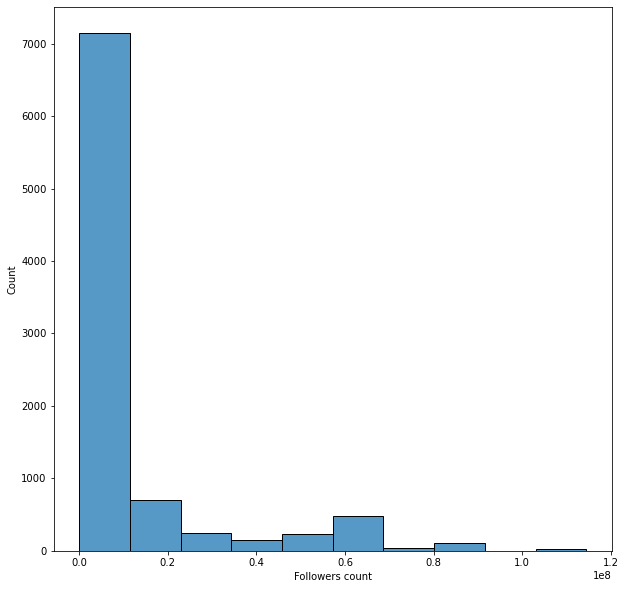

In [69]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Followers count', data = df[df['Impact_level'] == 'High'], bins =10)

<AxesSubplot:xlabel='Followers count', ylabel='Count'>

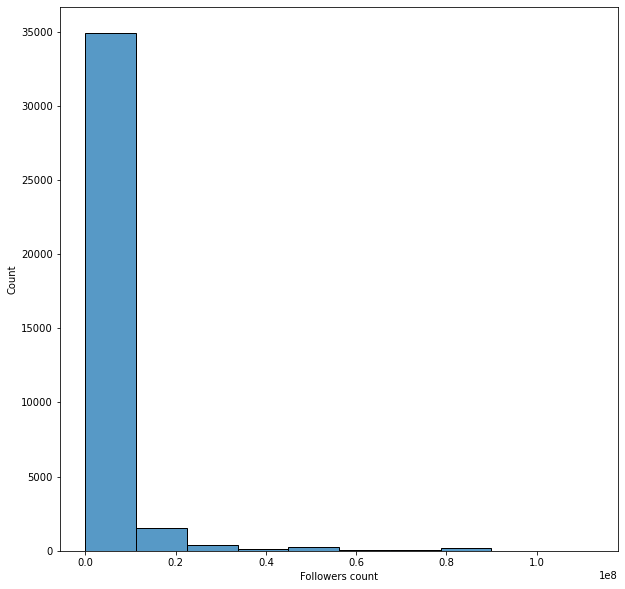

In [70]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'Followers count', data = df[df['Impact_level'] == 'Low'], bins =10)

<AxesSubplot:xlabel='Followers count', ylabel='Impact'>

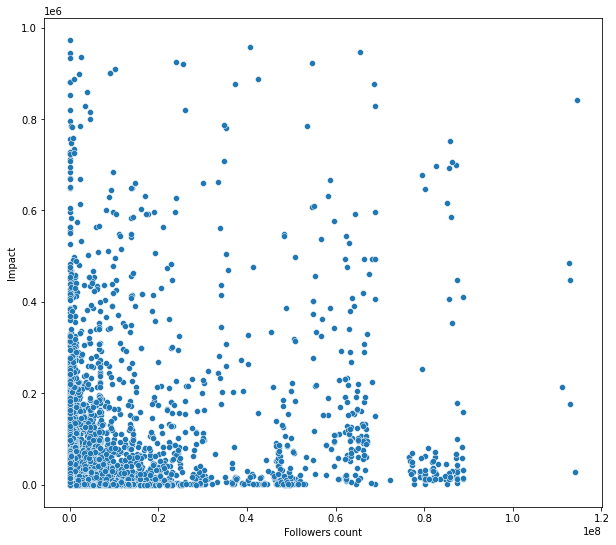

In [71]:
plt.figure(figsize = (10,9))
sns.scatterplot(x = 'Followers count', y = 'Impact', data = df.sample(10000))

There is a weak correlation between Followers count and Impact 

In [72]:
correlation('Followers count')

The correlation coefficient for Followers count and Impact is 0.26898012165612345


### Listed Count 
the number of lists the post author is a part of

Twitter Lists allow you to customize, organize and prioritize the Tweets you see in your timeline. You can choose to join Lists created by others on Twitter, or from your own account you can choose to create Lists of other accounts by group, topic or interest. 

In [73]:
df['Listed Count'].describe()

count     50000.000000
mean      10069.683200
std       28384.958681
min           0.000000
25%           2.000000
50%         555.500000
75%        6171.000000
max      568139.000000
Name: Listed Count, dtype: float64

<AxesSubplot:xlabel='Listed Count', ylabel='Count'>

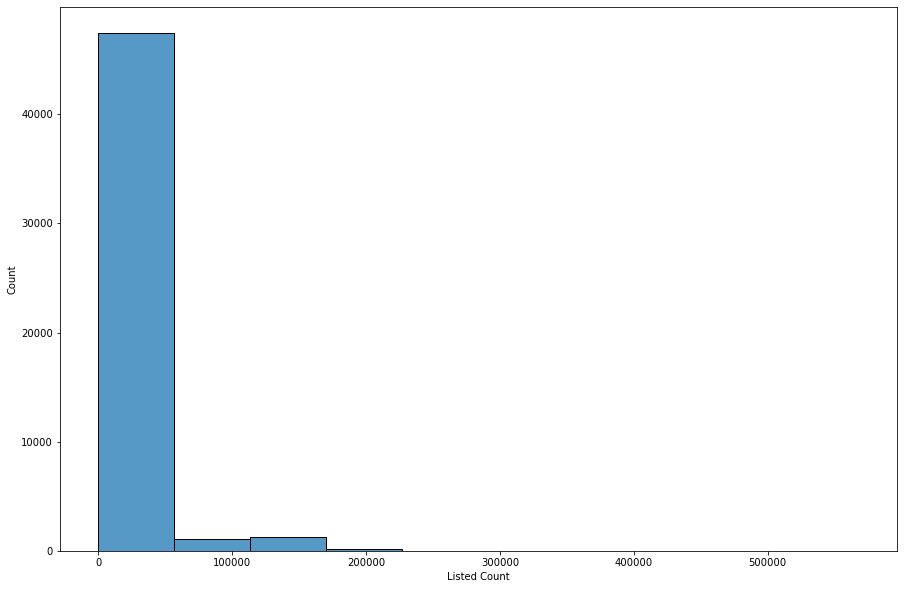

In [74]:
plt.figure(figsize = (15,10))
sns.histplot(x = 'Listed Count', data = df, bins =10)

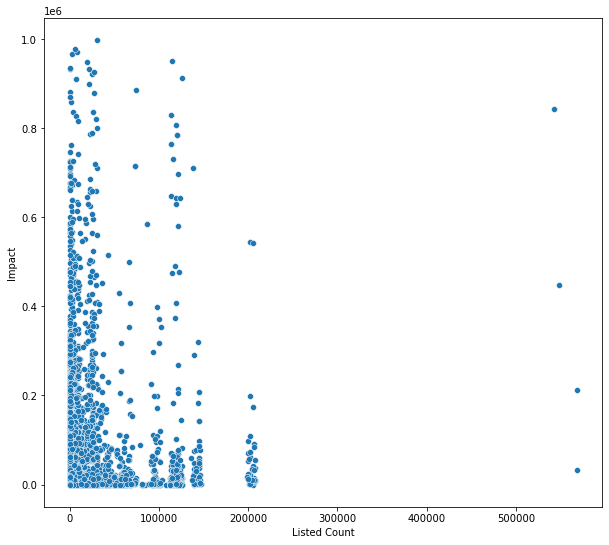

In [75]:
plt.figure(figsize = (10,9))
sns.scatterplot(x = 'Listed Count', y = 'Impact', data = df.sample(10000));

In [76]:
correlation('Listed Count')

The correlation coefficient for Listed Count and Impact is 0.12487730118677472


Very weak correlation with the Target variable

### Media Type

In [77]:
df['Media Type'].unique()

array(['TEXT', 'IMAGE', 'VIDEO'], dtype=object)

<AxesSubplot:xlabel='Media Type', ylabel='count'>

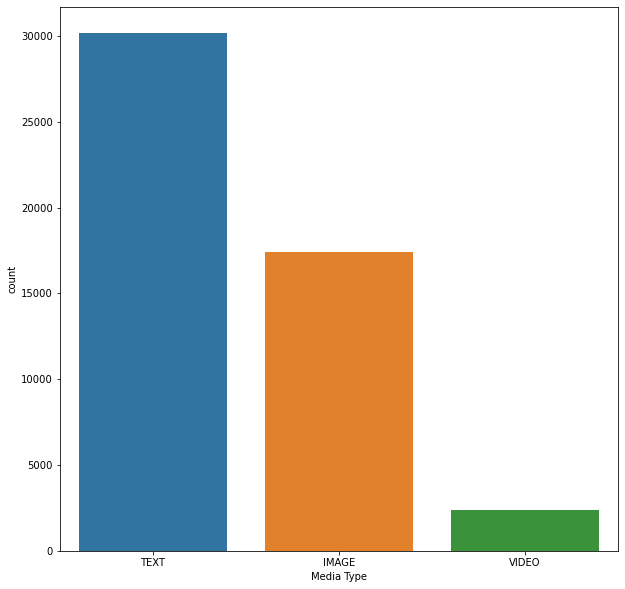

In [78]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Media Type', data = df)

<AxesSubplot:xlabel='Media Type', ylabel='count'>

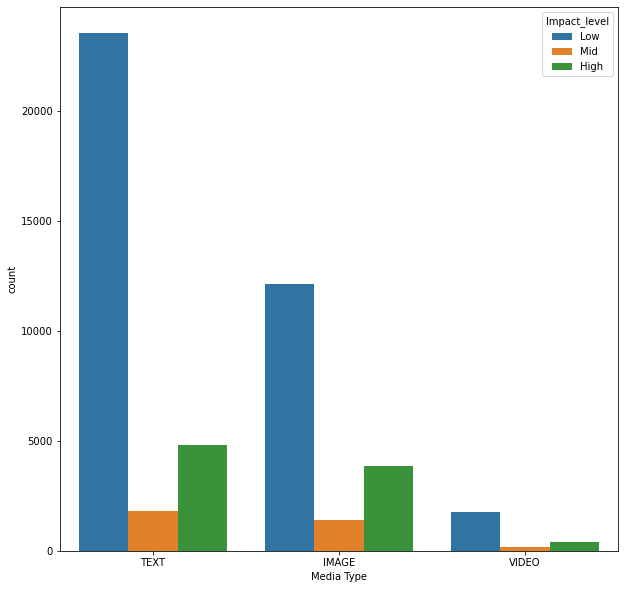

In [79]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Media Type', data = df, hue = 'Impact_level')

# Mentions Count

In [80]:
df['Mentions Count'].describe()

count    50000.000000
mean         0.113720
std          0.512984
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: Mentions Count, dtype: float64

<AxesSubplot:xlabel='Mentions Count', ylabel='Count'>

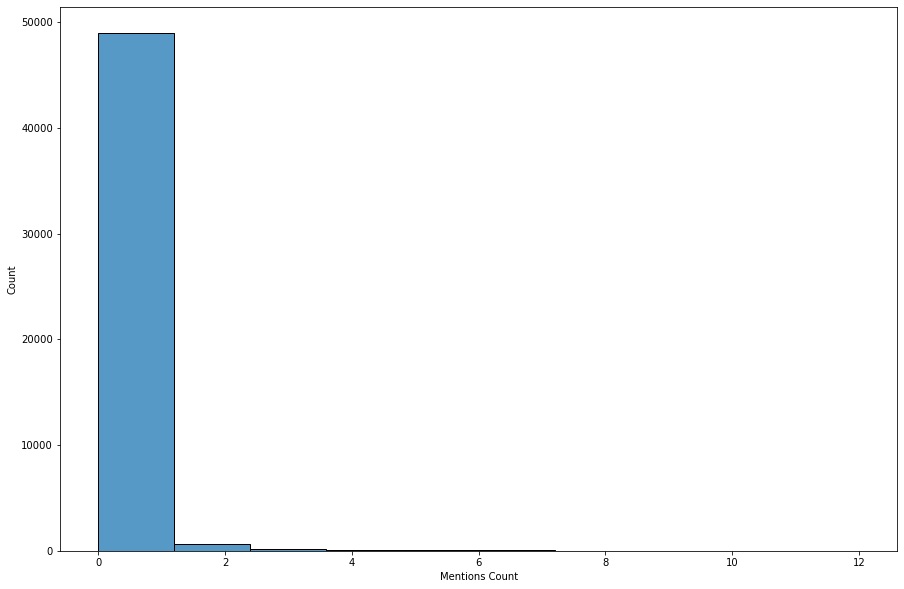

In [81]:
plt.figure(figsize = (15,10))
sns.histplot(x = 'Mentions Count', data = df, bins =10)

<AxesSubplot:xlabel='Mentions Count', ylabel='Count'>

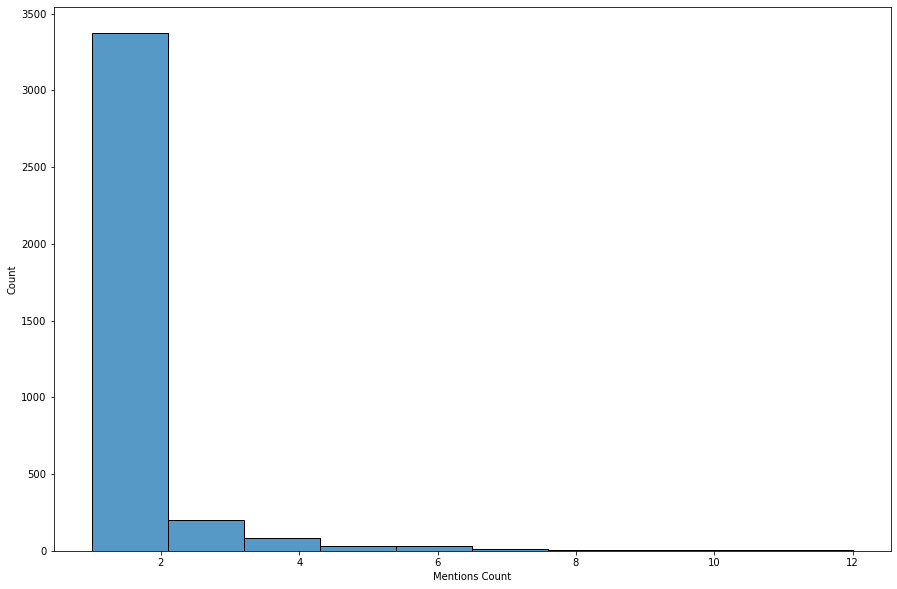

In [82]:
plt.figure(figsize = (15,10))
sns.histplot(x = 'Mentions Count', data = df[df['Mentions Count'] > 0], bins =10)

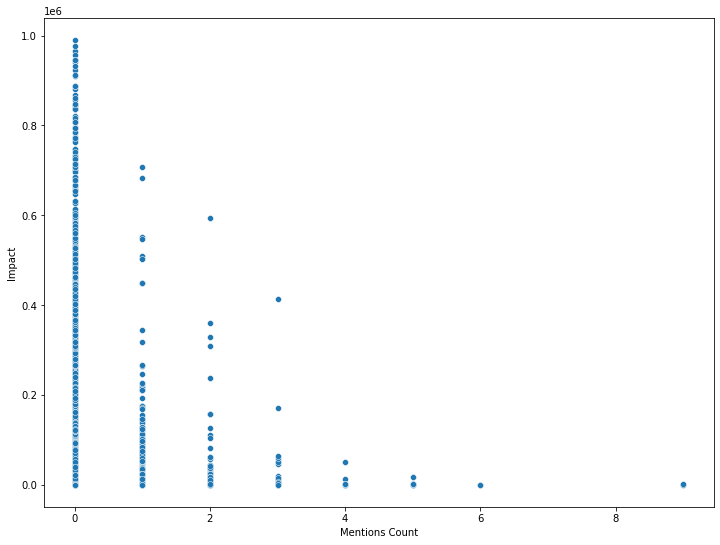

In [83]:
plt.figure(figsize = (12,9))
sns.scatterplot(x = 'Mentions Count', y = 'Impact', data = df.sample(10000));

In [84]:
correlation('Mentions Count')

The correlation coefficient for Mentions Count and Impact is -0.025372758936171334


### Post author verified

<AxesSubplot:xlabel='Post author verified', ylabel='count'>

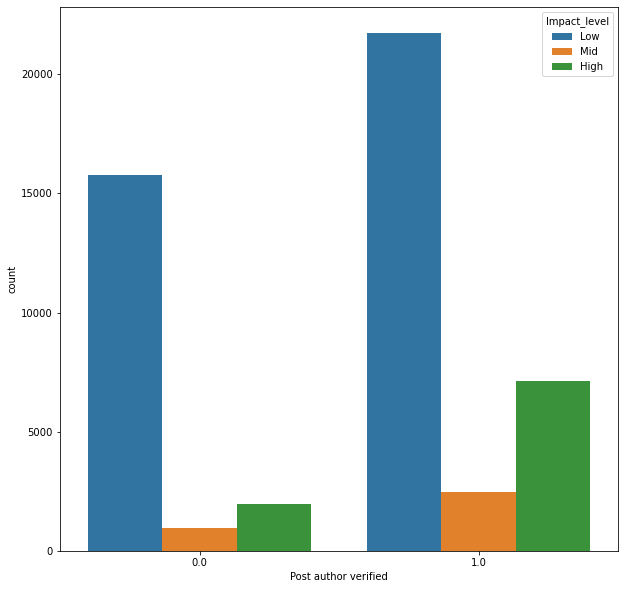

In [85]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Post author verified', data = df, hue = 'Impact_level')

Verified authors get more impact than non verified authors

### Likes

In [86]:
df['Likes'].describe()

count    50000.0000
mean      3020.7063
std       8261.9454
min          0.0000
25%          1.0000
50%        153.0000
75%       1909.0000
max      90919.0000
Name: Likes, dtype: float64

In [87]:
df[df['Impact_level'] == 'High']['Likes'].describe()

count     9108.000000
mean     14226.102328
std      14739.088192
min          0.000000
25%       5493.250000
50%       8311.500000
75%      16522.500000
max      90919.000000
Name: Likes, dtype: float64

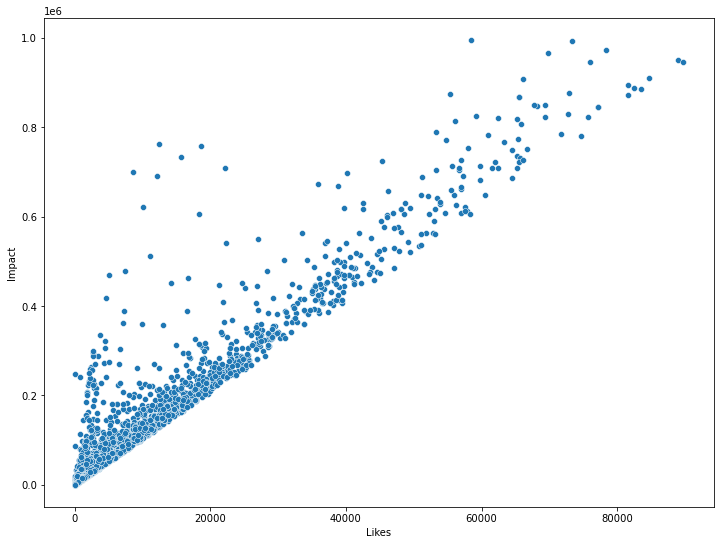

In [88]:
plt.figure(figsize = (12,9))
sns.scatterplot(x = 'Likes', y = 'Impact', data = df.sample(10000));

In [89]:
correlation('Likes')

The correlation coefficient for Likes and Impact is 0.9655337551170449


Highly correlated variable. Correlation with target variable is important

### Shares

In [90]:
df['Shares'].describe()

count    50000.000000
mean       966.773260
std       3117.212706
min          0.000000
25%          0.000000
50%         42.000000
75%        559.000000
max      79671.000000
Name: Shares, dtype: float64

In [91]:
df[df['Impact_level'] == 'High']['Shares'].describe()

count     9108.000000
mean      4508.526241
std       6104.517217
min          0.000000
25%       1227.750000
50%       2405.000000
75%       5320.500000
max      79671.000000
Name: Shares, dtype: float64

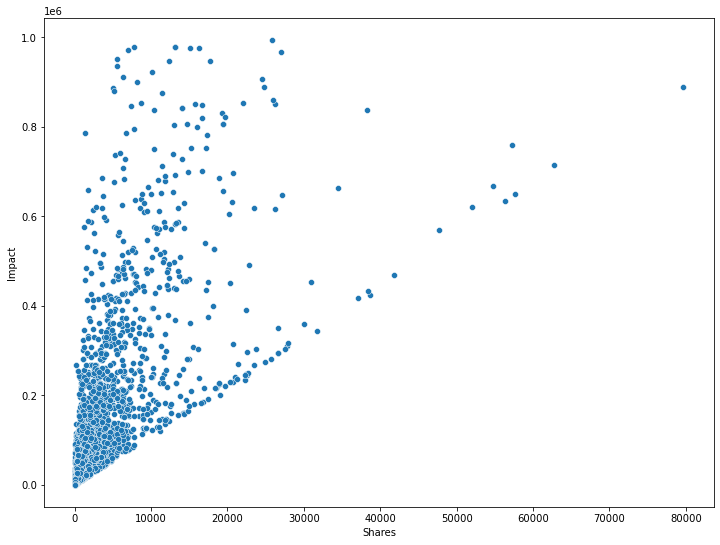

In [92]:
plt.figure(figsize = (12,9))
sns.scatterplot(x = 'Shares', y = 'Impact', data = df.sample(10000));

In [93]:
correlation('Shares')

The correlation coefficient for Shares and Impact is 0.7343159155363381


High correlation

In [94]:
correlation('Likes', 'Shares')

The correlation coefficient for Likes and Shares is 0.538010334680231


There is some positive correlation, but the value is not too high. We can allow small collinearity

### Comments

In [95]:
df.columns

Index(['Post Content', 'Sentiment score', 'Post Length', 'Hashtag count',
       'Content URL count', 'Tweet count', 'Followers count', 'Listed Count',
       'Media Type', 'Published DateTime', 'Mentions Count',
       'Post author verified', 'Likes', 'Shares', 'Comments', 'Impact',
       'Impact_level', 'Lang'],
      dtype='object')

In [96]:
df['Comments'].describe()

count    50000.000000
mean        16.407920
std        543.669304
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      66939.000000
Name: Comments, dtype: float64

In [97]:
df[df['Impact_level'] == 'High']['Comments'].describe()

count     9108.000000
mean        72.603206
std       1264.969147
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      66939.000000
Name: Comments, dtype: float64

Very low amount of comments , as even 75th percentile value is 0

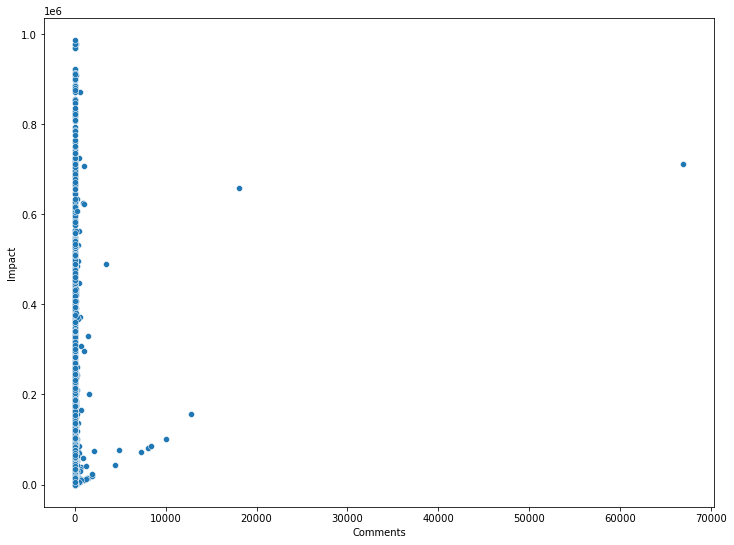

In [98]:
plt.figure(figsize = (12,9))
sns.scatterplot(x = 'Comments', y = 'Impact', data = df.sample(10000));

In [99]:
correlation('Comments')

The correlation coefficient for Comments and Impact is 0.07608749169638648


# Correlation analysis

<AxesSubplot:>

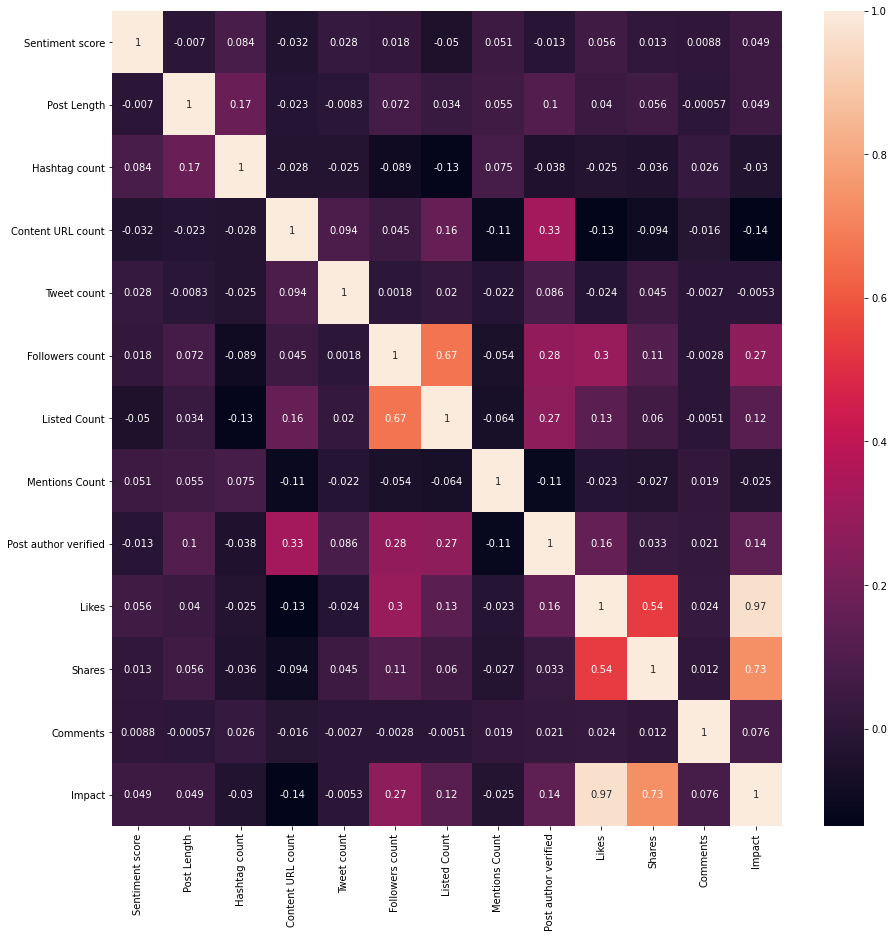

In [100]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)

High correlation between :

    Listed count, follower count (0.67)

This concludes the EDA

# Data Preprocessing

In [103]:
# We will not include the content of the post. have limited time and text modelling will take long
# Datetime is not needed
# Impact Level was drawn from the target variable. So dropping it

df.drop(['Post Content','Published DateTime','Impact_level'], axis = 1, inplace = True)

In [104]:
def lang(row):
    """There are too many variables in 'Lang'. English makes up more than half. So we will only include 
    two groups: en and others"""
    if row != 'en':
        row = 'other'
    return row

df['Lang'] = df['Lang'].apply(lang)

In [105]:
#Splitting the data
from sklearn.model_selection import train_test_split

X = df.drop('Impact', axis = 1)
y = df['Impact']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80)

In [106]:
from category_encoders import OneHotEncoder
#Applying One-Hot-Encoding to both the categorical variables: Lang and Media Type
ohe = OneHotEncoder(cols=['Lang', 'Media Type'], drop_invariant=True, use_cat_names = True)

ohe.fit(X_train)

#Transforming the data
X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [107]:
#Most of the variables require scaling of data. We will be using standard scaler for normalizing the data
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler().fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
def metrics(model):
    """This function will help us check the metrics for the models"""
    y_train_pred = model.predict(X_train_sc)
    y_test_pred = model.predict(X_test_sc)
    print('Training score')
    print('RMSE = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('MAE = ', mean_absolute_error(y_train, y_train_pred))
    print('R2 = ', r2_score(y_train, y_train_pred))
    print()
    print('Testing score')
    print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print('MAE = ', mean_absolute_error(y_test, y_test_pred))
    print('R2 = ', r2_score(y_test, y_test_pred))

# Modelling

### Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_sc, y_train)
metrics(lr)

Training score
RMSE =  7.880926992142783
MAE =  0.36026900359978714
R2 =  0.9999999941684814

Testing score
RMSE =  3.194435121245668
MAE =  0.31401927125990975
R2 =  0.9999999990323789


We are getting really good results with linear Regression. The model underfits a little. But the testing accuracy is really good

### Decision Tree Regression

In [116]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 15).fit(X_train_sc, y_train)

metrics(dtr)

Training score
RMSE =  291.0972252239286
MAE =  132.8043344297531
R2 =  0.9999920438457954

Testing score
RMSE =  4573.0422286483445
MAE =  819.1032938011074
R2 =  0.9980169775804689


The scores are way off. MAE and MSE is high, and the model overfits.

### Random Forest Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor
rtf = RandomForestRegressor(n_estimators=300, max_depth = 10).fit(X_train_sc, y_train)

metrics(rtf)

Training score
RMSE =  1605.9265129516145
MAE =  517.3108273352817
R2 =  0.9997578533881186

Testing score
RMSE =  3608.070277340423
MAE =  736.9399031332788
R2 =  0.9987655679845083


### XGBoost regressor

In [120]:
from xgboost import XGBRegressor
xgbr = XGBRegressor().fit(X_train_sc, y_train)

metrics(xgbr)

Training score
RMSE =  749.8670049822707
MAE =  329.1121620433553
R2 =  0.9999472046650351

Testing score
RMSE =  3174.7351100509145
MAE =  637.392885609436
R2 =  0.9990442766634177


All the tree based models fail to give good results. Most of them overfit and the results for training set is also not good enough.

# Explainable AI: Linear models

In [121]:
#eli5 is an library used for explainable AI. It is used to 'explain' how the model works
import eli5 as eli

In [122]:
eli.show_weights(lr, feature_names = X_train.columns.to_list())

Weight?,Feature
+11784265386518.146,Lang_other
+11784265386518.061,Lang_en
+82947.302,Likes
+40078.633,<BIAS>
+30574.219,Shares
+5273.861,Comments
+0.176,Listed Count
+0.074,Post Length
+0.040,Hashtag count
+0.015,Mentions Count


1. Likes, Shares and Comments have the highest weightage. 
2. Content URL count, Followers count and Post auhtor verified have the lowest
3. The value of weights is too high, we can use regularized methods to reduce the weights.
4. Both the Categorical features don't provide any important value

In [123]:
import random
rand1 = random.randint(1, len(X_test))

In [124]:
print("Actual Target Value : ", y_test.iloc[rand1])
eli.show_prediction(lr, X_test_sc[rand1], feature_names=X_train.columns.to_list(), show_feature_values=True)

Actual Target Value :  2350.0


As you see, the predicted value and actual value are really close 

In [125]:
rand2 = random.randint(1, len(X_test))
print("Actual Target Value : ", y_test.iloc[rand2])
eli.show_prediction(lr, X_test_sc[rand2], feature_names=X_train.columns.to_list(), show_feature_values=True)

Actual Target Value :  80890.0


In [126]:
#Lets drop Both categorical variables and run the tests again.
df.drop(['Lang', 'Media Type'], axis = 1, inplace = True)

In [127]:
#Splitting the data
from sklearn.model_selection import train_test_split

X = df.drop('Impact', axis = 1)
y = df['Impact']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80)

In [128]:
scaler =  StandardScaler().fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_sc, y_train)
metrics(lr)

Training score
RMSE =  7.88132074294632
MAE =  0.3478790043636756
R2 =  0.9999999941678986

Testing score
RMSE =  3.193528347566488
MAE =  0.3017639432306922
R2 =  0.9999999990329281


We were able to remove 2 features and scores were the same

In [130]:
eli.show_weights(lr, feature_names = X_train.columns.to_list())

Weight?,Feature
+82947.287,Likes
+40078.632,<BIAS>
+30574.233,Shares
+5273.863,Comments
+0.161,Listed Count
+0.054,Post Length
+0.033,Hashtag count
+0.013,Mentions Count
+0.010,Sentiment score
-0.003,Tweet count


Likes and Shares are the best features to predict Impact

### Ridge Regression

In [131]:
#Applies l2 norm regularization
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_sc, y_train)

metrics(ridge)

Training score
RMSE =  8.251797681144437
MAE =  1.2528640017065684
R2 =  0.999999993606713

Testing score
RMSE =  4.0012322043526645
MAE =  1.20782653517902
R2 =  0.9999999984818848


### Lasso

In [132]:
#Applies l1 norm regularization

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_sc, y_train)

metrics(lasso)

Training score
RMSE =  8.165573819966319
MAE =  1.0909335248983376
R2 =  0.9999999937396231

Testing score
RMSE =  3.883644393958693
MAE =  1.0531789529101572
R2 =  0.9999999985698022


The scores with regularzation are not good. The best model amongst all is the Linear Regression model.

# Final Validation : Linear Regression

In [136]:
X_sc = scaler.transform(X)

In [137]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_sc, y, scoring = 'neg_mean_absolute_error', cv = 10)
print(abs(scores))
print('MAE: {} +- {}'.format(np.mean(abs(scores)), np.std(abs(scores))))

[0.30164578 0.22755197 0.37866927 0.27079518 0.38428529 0.4329802
 0.30125763 0.26104159 0.25490413 0.40739162]
MAE: 0.32205226748098703 +- 0.06877780096102676


In [138]:
import time
start_time = time.time()
lr.predict(X_test_sc)

print("Time taken for predicting {} instances = {} s".format(X_test_sc.shape[0],time.time()-start_time))

Time taken for predicting 12500 instances = 0.0009789466857910156 s


# Conclusion

### Model

So the model performs well for all instances of data.

The model is simple and lightning fast.

we used only 17 features to predict the impact

### Dataset

Likes Shares comments decide the Impact

It will also help if you are verified and have a high follower count.